In [1]:
# converting Rowena's test scripts to Python. 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib  widget

In [2]:
# fixing random state for reproducibility
np.random.seed(19680801)

cor=0.4 #set a correlation value 
m = 10 #dimension of grid 
sig=np.sqrt(-2*np.log(cor))
phs=np.random.randn(m,m)*sig
data=np.exp(1j*phs) # make it a complex number with mag=1

#print(data)

# phs are random angles with given sigma (radians)
# data is the complex numbers associated with those phs with magnitude 1 (normalized to unit circle)

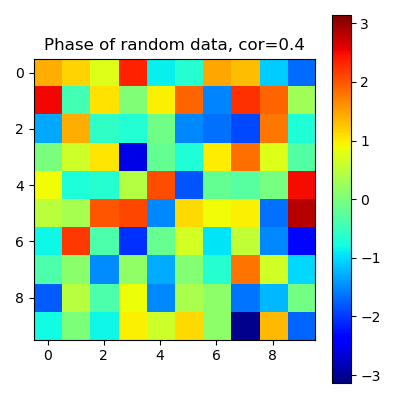

In [3]:
# plot the random numbers 
plt.figure(figsize=(4,4), tight_layout=True)
plt.imshow(np.angle(data),vmin=-3.14,vmax=3.14,cmap='jet')
plt.colorbar()
plt.title('Phase of random data, cor='+str(cor))
plt.show()

In [4]:
# number of slices for polar histogram 
N = 20

# these are for bar chart in polar coords
theta=np.linspace(-np.pi, np.pi, N, endpoint=False) # excludes endpoints so rand nums won't 
                                                   # include 2*pi as last number
angles = np.angle(data)
# angles is the data, theta is the bins 
#counts = np.histogram(angles,theta,range=(-np.pi,np.pi))
counts = np.histogram(angles,theta)
#print(np.max(counts[0]))
# the second array in counts is now the same as theta, so getting rid of it here: 
counts = counts[0]
print(np.sum(counts))
counts = counts/np.max(counts)
print(counts)

99
[0.09090909 0.09090909 0.09090909 0.18181818 0.63636364 0.72727273
 0.36363636 1.         0.45454545 0.81818182 0.72727273 0.54545455
 0.81818182 0.81818182 0.45454545 0.27272727 0.54545455 0.27272727
 0.09090909]


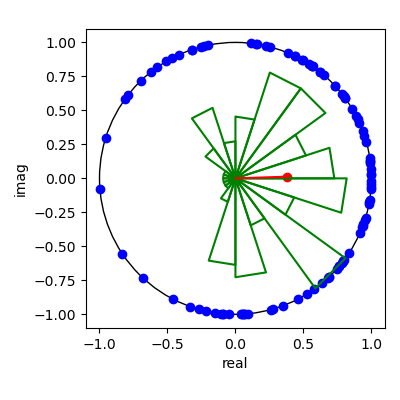

In [5]:
# plot it
plt.figure(figsize=(4,4), tight_layout=True)
ax = plt.gca() # get the axis handle
ax.set_aspect(1) # set aspect ratio to 1 
circle=plt.Circle([0,0],1,fill=False)
plt.gca().add_patch(circle)
plt.scatter(np.real(data),np.imag(data),color='b')

for i in range(N-1):
    x=np.array([0,counts[i]*np.cos(theta[i]),counts[i]*np.cos(theta[i+1]),0])
    y=np.array([0,counts[i]*np.sin(theta[i]),counts[i]*np.sin(theta[i+1]),0])
    ax.plot(x,y,'g')
x=np.array([0,counts[-1]*np.cos(theta[-1]),counts[-1]*np.cos(theta[0]),0])
y=np.array([0,counts[-1]*np.sin(theta[-1]),counts[-1]*np.sin(theta[0]),0])
ax.plot(x,y,'g')

# plot the mean of all the data as point and vector from origin
plt.scatter(np.real(np.mean(data)),np.imag(np.mean(data)),c='r')
plt.plot([0,np.real(np.mean(data))],[0,np.imag(np.mean(data))],'-r')
plt.xlabel('real')
plt.ylabel('imag')
#plt.xlim([-1,1])
#plt.ylim([-1,1])
#plt.grid()
plt.show()